# Part II - Ford GoBike System Data Key Insights Presentation
## by Agyo Jephthah Job

## Investigation Overview


> In this investigation, I wanted to look at how long users go on bike rides. If their age or gender affect the duration of these rides. The main focus was on the relationship between variables like the duration, gender, age, start and end time of the users in the data set.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset was for 2019, Feb.

> The male gender has the higest proportion with about 75%, followed by female with 23%, and Other with 2 %. 90.5% of individuals in the dataset are Subscribers, while 9.5% are Customers. Most of the users fall between the age range of 25 - 45.

In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('tripdata.csv')

In [39]:
# Data wrangling.

# Changing Start and end time data type
df[['start_time', 'end_time']]= df[['start_time', 'end_time']].astype('datetime64[ns]')

# Changing start_station_id and end_station_id data type to int to remove the decimal points
df[['start_station_id', 'end_station_id']] = df[['start_station_id', 'end_station_id']].astype('object')

# Dropping all NA values
df.dropna(axis=0, inplace=True)

## Proportion of user types and genders

> The dataset contains 174952 individual entries. 
> There are 2 user types:
- 90.5% of individuals in the dataset are Subscribers, while
- 9.5% are Customers

> There 3 different genders represented:
- The male gender has the higest proportion with about 75%,
- Female with 23%, 
- and Other with 2%.

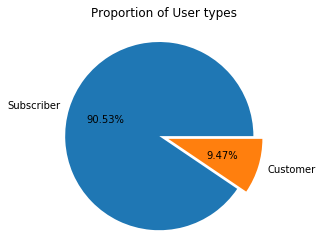

In [40]:
c = df['user_type'].value_counts()
plt.pie(c, labels = c.index, explode= [0,0.1], autopct= '%1.2f%%');
plt.axis('square');
plt.title('Proportion of User types');

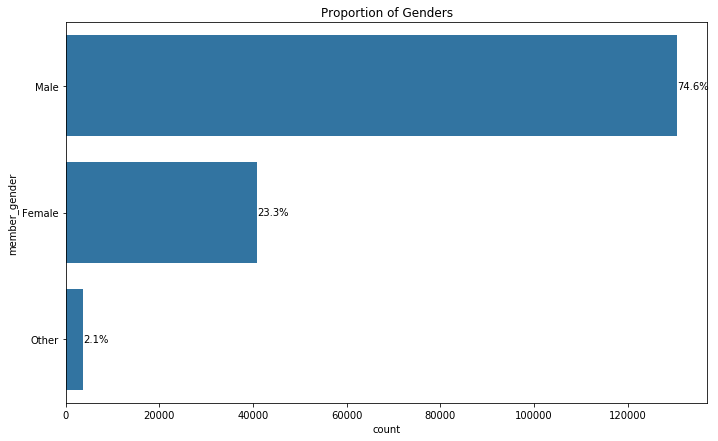

In [41]:
color_ = sb.color_palette()[0]
order_ = df['member_gender'].value_counts().index
orders = df['member_gender'].value_counts()
total_df = df.shape[0]

plt.figure(figsize = (11.5,7))
sb.countplot(data = df, y = 'member_gender', color = color_, order = order_);
plt.title('Proportion of Genders')

for i in range(orders.shape[0]):
    count = orders[i]
    p_srt = '{:0.1f}%'.format(100*count/total_df)
    plt.text(count + 1, i, p_srt, va ='center');

## Age Distribution of all users

> - Users age falls between 17 and 90

> - There are few outliers, ages above 90

> - Most the bikers have age range of 25 - 45 (for all genders)

> - The male gender has more users with ages that are above 45 compared to the rest of the genders.

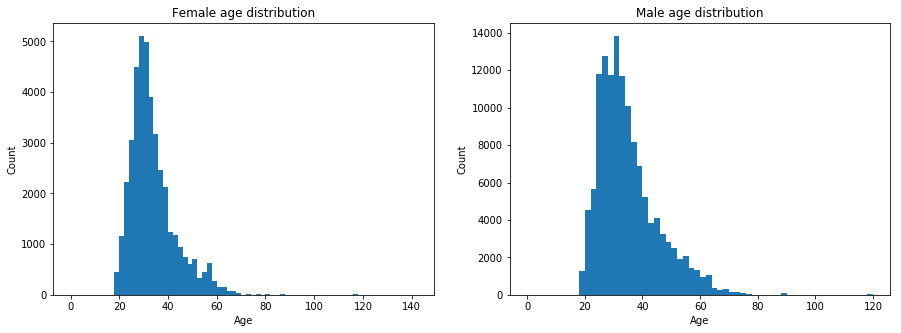

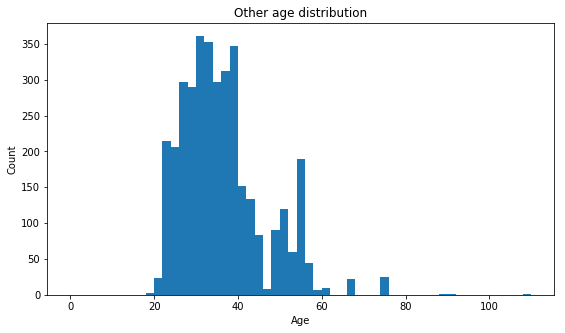

In [42]:
# Use 2019 to calculate the age.
base_date = df['start_time'].dt.year.max()

df['age'] = base_date - df['member_birth_year']

# Convert the data type from float to int
df[['member_birth_year', 'age']] = df[['member_birth_year', 'age']].astype('int')

# Seperating the dataset to contain only a specific gender
female = df.query('member_gender == "Female"')
male = df.query('member_gender == "Male"')
others = df.query('member_gender == "Other"')

# Plotting a general hist. for the ages
bins = np.arange(0, df['age'].max()+2, 2)

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1) 
bins = np.arange(0, female['age'].max()+2, 2)
plt.hist(data = female, x = 'age', bins = bins);
plt.title('Female age distribution')
plt.ylabel('Count')
plt.xlabel('Age');


plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, male['age'].max()+2, 2)
plt.hist(data = male, x = 'age', bins = bins);
plt.title('Male age distribution')
plt.ylabel('Count')
plt.xlabel('Age');

plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
bins = np.arange(0, others['age'].max()+2, 2)
plt.hist(data = others, x = 'age', bins = bins);
plt.title('Other age distribution');
plt.ylabel('Count')
plt.xlabel('Age');


## Relationship between the age of riders and the duration of the rides

> When it comes to the relationship of individual age and how long they went for a bike ride, the older the rider the shorter the ride. 
- Most of the users are clustered around the age of 20 and 60

Text(0.5,1,'Relationship between Age and Ride Duration')

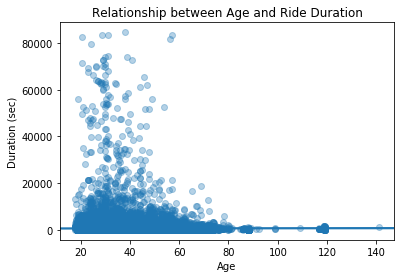

In [43]:
sb.regplot(data = df, y = 'duration_sec', x = 'age', x_jitter = 0.3,
          scatter_kws = {'alpha':1/3});
plt.ylabel('Duration (sec)')
plt.xlabel('Age');
plt.title('Relationship between Age and Ride Duration')

## User types Relationship between start time and end time of rides.

> Looking at the relationship between the start time of users and their end time, for both subscribers and customers.

> For both categories, there is a potive relationship.
- The earlier users for rides the longer the duration.

In [44]:

def hours(c):
    '''
    This function takes a timestamp column and extract just the Hour
    and converts the hours in 24h format to 12h format.
    Returns a list of the converted hours...
    ''' 
    #Create an empty list to hold the new time
    d = []
    e = [] # for time with either am or pm (trial)...

    # Loop through list to convert time and append to new list
    for i in c:
        a = i - 12
        if a <= 0:
            d.append(i)
            e.append(str(i)+"am")
        else:
            d.append(a)
            e.append(str(a)+"pm")
    return d, e

# create a variable holding the time columns
start_time = df['start_time'].dt.hour
end_time = df['end_time'].dt.hour

# Create new columns
df['initial_stime'] = hours(start_time)[0]
df['start_hour'] = hours(start_time)[1]

df['initial_etime'] = hours(end_time)[0]
df['end_hour'] = hours(end_time)[1]


			 Relationship Between Start and End Time (in hours)


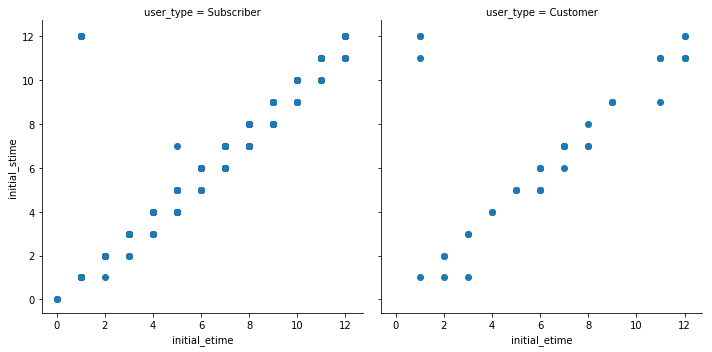

In [45]:
print('\t\t\t Relationship Between Start and End Time (in hours)')
s = np.random.choice(df.shape[0], 500, replace = False)
sample = df.loc[s]


g = sb.FacetGrid(data = sample, col = 'user_type', size = 5,
                margin_titles = True)
g.map(plt.scatter, 'initial_etime', 'initial_stime');

> **Thank you...**

> **The End...**

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt